In [2]:
!pip install numpy statsmodels matplotlib seaborn pandas scikit-learn

In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF

In [8]:
iris = datasets.load_iris()
df = pd.DataFrame(
  iris.data,
  columns=iris.feature_names
)
df['target'] = iris.target
# Map targets to target names
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['target_names'] = df['target'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


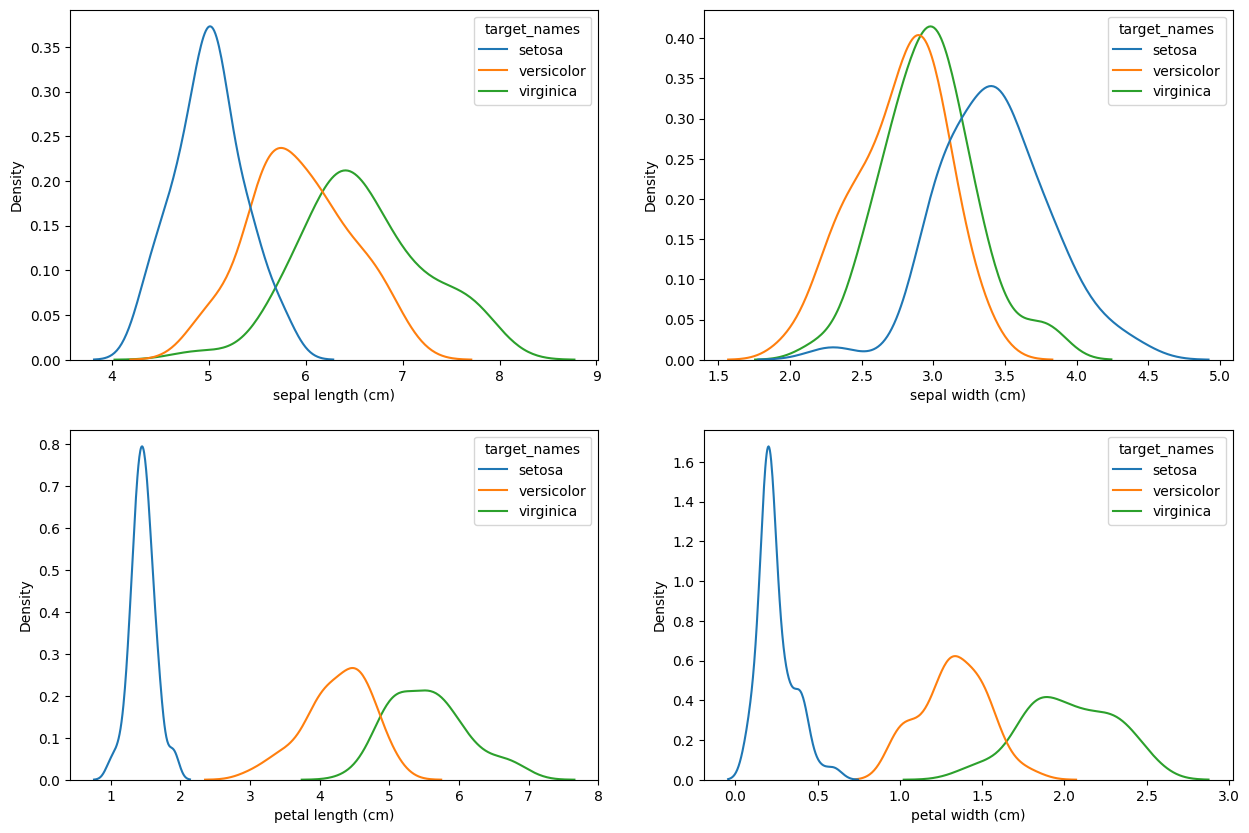

In [26]:
f, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for ax, feature in zip(axs, iris.feature_names):
  sns.kdeplot(df, x=feature, ax=ax, hue="target_names")

In [14]:
from itertools import combinations


def cohens_d(group_1, group_2):
  n_1 = len(group_1)
  n_2 = len(group_2)
  pooled_sd = np.sqrt((
      np.var(group_1, ddof=1) * (n_1 - 1) +  np.var(group_2, ddof=1) * (n_2 - 1)
  ) / (n_1 + n_2 - 2))
  return (np.mean(group_1) - np.mean(group_2)) / pooled_sd


pairs = list(combinations(df['target_names'].unique(), r=2))
result = []
for pair in pairs:
  result.append([])
  for feature in iris.feature_names:
    group_1 = df.loc[df['target_names'] == pair[0], feature]
    group_2 = df.loc[df['target_names'] == pair[1], feature]
    result[-1].append(cohens_d(group_1, group_2))

In [29]:
differences = pd.DataFrame(result, index=pairs, columns=iris.feature_names)
differences.name = differences.index.name = "cohen's d"

In [30]:
differences

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cohen's d,,,,
"(setosa, versicolor)",-2.104197,1.890995,-7.898544,-6.816068
"(setosa, virginica)",-3.077239,1.290070,-9.997237,-8.557160
"(versicolor, virginica)",-1.125833,-0.641152,-2.520756,-2.925073


In [21]:
def diff_to_text_description(diff):
  diff = np.abs(diff)
  if diff < 0.01:
    return "very small"
  elif diff < 0.2:
    return "small"
  elif diff < 0.5:
    return "medium"
  elif diff < 0.8:
    return "large"
  elif diff < 1.2:
    return "very large"
  elif diff < 2:
    return "huge"
  else:
    return ">huge"

differences.applymap(diff_to_text_description)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
"(setosa, versicolor)",>huge,huge,>huge,>huge
"(setosa, virginica)",>huge,huge,>huge,>huge
"(versicolor, virginica)",very large,large,>huge,>huge
